In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [16]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
target = raw_df.values[1::2, 2]
boston = pd.read_csv("Boston_Housing.csv")

In [17]:
target = pd.DataFrame(target, columns=["Price"])
boston = pd.concat([boston, target], axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN,36.2


In [18]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  Unnamed: 14  0 non-null      float64
 15  Price        506 non-null    float64
dtypes: float64(13), int64(3)
memory usage: 63.4 KB


In [19]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,NaN,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,NaN,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,NaN,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,NaN,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,NaN,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN,50.000000


In [20]:
type(boston)

pandas.core.frame.DataFrame

In [21]:
boston.drop(["Unnamed: 14"], axis=1, inplace=True)
boston.drop(["MEDV"], axis=1, inplace=True)

In [22]:
boston.shape

(506, 14)

In [23]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [24]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

 را حساب کنیمcorrelation برای اینکه تعیین کنیم کدام یک از ویژگی ها خوب است باید معیار 

In [25]:
corr = boston.corr()
corr.shape
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [26]:
x = boston[["RM"]]
y = boston["Price"]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [28]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

فرض کنید که معادله رگرسیون خطی ساده مانند زیر باشد:
y=b0 + b1(x1)

In [29]:
slr.intercept_ # b0

-33.850046070499985

In [154]:
slr.coef_ # b1

array([8.96006106])

In [31]:
coefficients = pd.DataFrame([x_train.columns, slr.coef_]).T
coefficients= coefficients.rename(columns={0:"Attribute", 1:"coefficient"})
coefficients

,Attribute,coefficient
0,RM,8.960061


In [156]:
from sklearn import metrics
y_pred = slr.predict(x_test)

In [157]:
print("R^2 : ", metrics.r2_score(y_test,y_pred))
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE : ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAPE : ", metrics.mean_absolute_percentage_error(y_test,y_pred))

R^2 :  0.5065734010320511
MAE :  4.853146476052217
MSE :  51.52364113002358
RMSE :  7.1779970137931635
MAPE :  0.2634008709209126


Text(0, 0.5, 'predicted price')

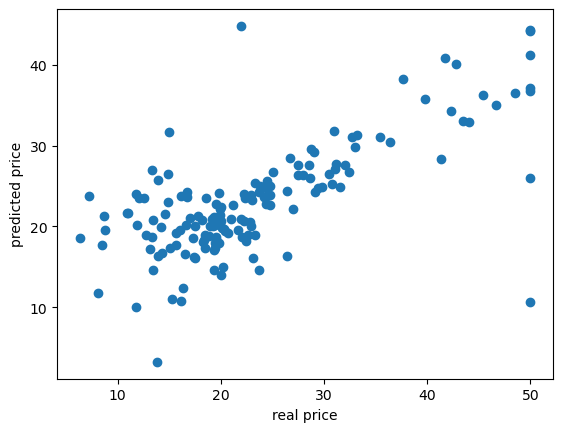

In [158]:
plt.scatter(x=y_test, y=y_pred )
plt.xlabel("real price")
plt.ylabel("predicted price")


 Multiple Linear Regression

In [159]:
x_MLR = boston.drop(["Price"], axis=1)
y_MLR = boston["Price"]

In [160]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(x_MLR,y_MLR,test_size=0.3, random_state=4)

In [162]:
mlr = LinearRegression()
mlr.fit(X_train,Y_train)

LinearRegression()

In [163]:
mlr.intercept_

36.35704137659566

In [164]:
mlr.coef_

array([-1.22569795e-01,  5.56776996e-02, -8.83428230e-03,  4.69344849e+00,
       -1.44357828e+01,  3.28008033e+00, -3.44778157e-03, -1.55214419e+00,
        3.26249618e-01, -1.40665500e-02, -8.03274915e-01,  9.35368715e-03,
       -5.23477529e-01])

In [172]:
coefficient = pd.DataFrame([x_MLR.columns, mlr.coef_]).T
coefficient = coefficient.rename(columns={0:"Attributes", 1:"coefficient"})
coefficient

,Attributes,coefficient
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


In [177]:
y_mlr_pred = mlr.predict(X_test)
y_mlr_pred

array([11.07380893, 26.47910329, 17.34489869, 19.1948608 , 36.36170735,
       24.77095832, 31.00051311, 19.94226881, 19.22375105, 24.42998435,
       28.31512637, 28.40796034, 19.27427968, 33.82295207, 21.28596487,
       15.11171444, 20.97688767, 11.28556596, 11.8611348 , 13.88444387,
        5.37422679, 17.55278177, 20.58171204, 22.59849951, 16.07544265,
       20.45924503, 19.1068775 , 14.37832191, 21.23235601, 17.52186564,
       14.40725559, 23.68483414, 33.7410661 , 22.02733357, 17.62139147,
       19.97241153, 30.24069397, 34.69718954, 23.85821534, 24.30715093,
       36.13378112, 31.97532293, 19.626175  , 31.61097971, 34.58127809,
       25.62718797, 39.95041812, 17.60880538, 19.90319708, 23.40417501,
       33.70182396, 25.62491083, 18.25559302, 27.27317174, 13.46377871,
       23.43470656, 24.43721849, 33.52056736, 16.99896935, 37.94464404,
       15.94567818, 19.32528916, 31.84088262, 15.25081303, 38.40344789,
       27.45372884, 34.36154312,  9.37353936, 19.42580066, 21.99

In [178]:
print("R^2 : ", metrics.r2_score(Y_test,y_mlr_pred))
print("MAE : ", metrics.mean_absolute_error(Y_test,y_mlr_pred))
print("MSE : ", metrics.mean_squared_error(Y_test,y_mlr_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test,y_mlr_pred)))
print("MAPE : ", metrics.mean_absolute_percentage_error(Y_test,y_mlr_pred))

R^2 :  0.7121818377409195
MAE :  3.859005592370744
MSE :  30.05399330712414
RMSE :  5.482152251362976
MAPE :  0.17849125536283458


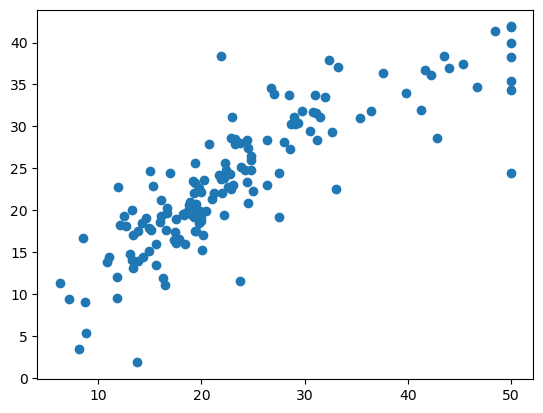

In [179]:
plt.scatter(x=Y_test, y=y_mlr_pred)

Polynomial Regression

In [180]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
quadratic = LinearRegression()
quadratic.fit(X_train_quadratic, Y_train)

LinearRegression()

In [181]:
y_test_predict = quadratic.predict(poly_features.fit_transform(X_test))

In [182]:
print("R^2 : ", metrics.r2_score(Y_test,y_test_predict))

R^2 :  0.858133637543098
